In [48]:
# https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

import numpy as np
import matplotlib.pyplot as plt
# Plotly
import plotly.plotly as py
import plotly.tools as tls
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import time
import tensorflow as tf

In [79]:
name = '0700.HK'
filename = 'daily_{}'.format(name)
df = pd.read_csv('dataset/{}.csv'.format(filename))
df = df.dropna()

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d').sort_values(ascending=True)
date = df['Date']
# date = df['Date'].map(datetime.datetime.toordinal)

valid_set_size_percentage = 10 
test_set_size_percentage = 10 

df = df.iloc[:, 4:5].values

# date = np.array(date)
# (-1,1) unknown row, 1 column
date = date.values
date = date.reshape(-1,1)

df

array([[ 12.78    ],
       [ 12.82    ],
       [ 12.64    ],
       ...,
       [393.600006],
       [395.600006],
       [391.600006]])

In [50]:
sc = MinMaxScaler(feature_range = (0, 1))
df_scaled = sc.fit_transform(df)
len(df)


2471

In [54]:
valid_set_size = int(np.round(valid_set_size_percentage/100*len(df)));  
test_set_size = int(np.round(test_set_size_percentage/100*len(df)));
train_set_size = len(df) - (valid_set_size + test_set_size);
  
training_set_scaled = df_scaled[:train_set_size]
valid_set_scaled = df_scaled[train_set_size:train_set_size+valid_set_size]
test_set_scaled = df_scaled[train_set_size+valid_set_size:]


# valid_stock_price = df[train_set_size:valid_set_size]
# date_valid = date[train_set_size:train_set_size+valid_set_size]
# print(date_valid)



[['2017-04-20T00:00:00.000000000']
 ['2017-04-21T00:00:00.000000000']
 ['2017-04-24T00:00:00.000000000']
 ['2017-04-25T00:00:00.000000000']
 ['2017-04-26T00:00:00.000000000']
 ['2017-04-27T00:00:00.000000000']
 ['2017-04-28T00:00:00.000000000']
 ['2017-05-02T00:00:00.000000000']
 ['2017-05-04T00:00:00.000000000']
 ['2017-05-05T00:00:00.000000000']
 ['2017-05-08T00:00:00.000000000']
 ['2017-05-09T00:00:00.000000000']
 ['2017-05-10T00:00:00.000000000']
 ['2017-05-11T00:00:00.000000000']
 ['2017-05-12T00:00:00.000000000']
 ['2017-05-15T00:00:00.000000000']
 ['2017-05-16T00:00:00.000000000']
 ['2017-05-17T00:00:00.000000000']
 ['2017-05-18T00:00:00.000000000']
 ['2017-05-19T00:00:00.000000000']
 ['2017-05-22T00:00:00.000000000']
 ['2017-05-23T00:00:00.000000000']
 ['2017-05-24T00:00:00.000000000']
 ['2017-05-25T00:00:00.000000000']
 ['2017-05-26T00:00:00.000000000']
 ['2017-05-29T00:00:00.000000000']
 ['2017-05-31T00:00:00.000000000']
 ['2017-06-01T00:00:00.000000000']
 ['2017-06-02T00:00:

In [21]:
X_train = []
y_train = []
X_valid = []
y_valid = []
X_test = []
y_test = []

# LSTMs expect our data to be in a specific format, 
# usually a 3D array. We start by creating data in 60 timesteps 
# and converting it into an array using NumPy.
# Next, we convert the data into a 3D dimension array with X_train samples, 
# 60 timestamps, and one feature at each step.
    
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
for i in range(60, len(valid_set_scaled)):
    X_valid.append(valid_set_scaled[i-60:i, 0])
    y_valid.append(valid_set_scaled[i, 0])
    
for i in range(60, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_valid, y_valid = np.array(X_valid), np.array(y_valid)
X_test, y_test = np.array(X_test), np.array(y_test)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape,X_valid.shape,X_test.shape)


(1917, 60, 1) (187, 60, 1) (187, 60, 1)


In [37]:
regressor = Sequential()

# units means that how many output nodes of dense layer should be returned.
# Because the fully connected layer(dense layer) should consist of input and output.
# Then , the mean of dimensionality of the output space could be translated to the number of ouput nodes.

# regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1), kernel_initializer='random_uniform'))
# regressor.add(Dropout(0.5))

# regressor.add(Dense(20,activation='relu'))

# regressor.add(Dense(1,activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)

regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1], 1), kernel_initializer='random_uniform'))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm_21 (UnifiedLSTM (None, 60, 50)            10400     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
unified_lstm_22 (UnifiedLSTM (None, 60, 50)            20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
unified_lstm_23 (UnifiedLSTM (None, 60, 50)            20200     
_________________________________________________________________
dropout_23 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
unified_lstm_24 (UnifiedLSTM (None, 50)               

In [62]:
finishTime = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(finishTime))

regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=[X_valid,y_valid],callbacks=[tb_callback])

Train on 1917 samples, validate on 187 samples
Epoch 1/100
  32/1917 [..............................] - ETA: 1:55 - loss: 4.5607e-04

W0422 18:31:16.491096 4780348864 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (2.326682). Check your callbacks.


1917/1917 [==============================] - 21s 11ms/sample - loss: 5.6403e-04 - val_loss: 0.0029
Epoch 2/100
1917/1917 [==============================] - 13s 7ms/sample - loss: 6.2168e-04 - val_loss: 0.0072
Epoch 3/100
1917/1917 [==============================] - 13s 7ms/sample - loss: 5.2545e-04 - val_loss: 0.0162
Epoch 4/100
1917/1917 [==============================] - 13s 7ms/sample - loss: 5.1007e-04 - val_loss: 0.0072
Epoch 5/100
1917/1917 [==============================] - 13s 7ms/sample - loss: 5.0799e-04 - val_loss: 0.0078
Epoch 6/100
1917/1917 [==============================] - 13s 7ms/sample - loss: 5.3016e-04 - val_loss: 0.0057
Epoch 7/100
1917/1917 [==============================] - 12s 7ms/sample - loss: 5.3578e-04 - val_loss: 0.0101
Epoch 8/100
1917/1917 [==============================] - 13s 7ms/sample - loss: 4.5859e-04 - val_loss: 0.0125
Epoch 9/100
1917/1917 [==============================] - 13s 7ms/sample - loss: 4.9066e-04 - val_loss: 0.0092
Epoch 10/100
1917/191

Epoch 75/100
1917/1917 [==============================] - 14s 7ms/sample - loss: 2.8423e-04 - val_loss: 0.0046
Epoch 76/100
1917/1917 [==============================] - 18s 10ms/sample - loss: 2.9671e-04 - val_loss: 0.0066
Epoch 77/100
1917/1917 [==============================] - 24s 13ms/sample - loss: 2.8734e-04 - val_loss: 0.0039
Epoch 78/100
1917/1917 [==============================] - 20s 10ms/sample - loss: 2.6889e-04 - val_loss: 0.0046
Epoch 79/100
1917/1917 [==============================] - 14s 7ms/sample - loss: 2.9054e-04 - val_loss: 0.0028
Epoch 80/100
1917/1917 [==============================] - 14s 7ms/sample - loss: 2.7821e-04 - val_loss: 0.0023
Epoch 81/100
1917/1917 [==============================] - 20s 10ms/sample - loss: 2.7923e-04 - val_loss: 0.0045
Epoch 82/100
1917/1917 [==============================] - 19s 10ms/sample - loss: 2.9313e-04 - val_loss: 0.0019
Epoch 83/100
1917/1917 [==============================] - 22s 11ms/sample - loss: 2.7081e-04 - val_loss: 0.

In [75]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
valid_stock_price = regressor.predict(X_valid)
valid_stock_price = sc.inverse_transform(valid_stock_price)
# print(predicted_stock_price.shape)
# print(real_stock_price.shape)
regressor.evaluate(X_test,y_test)

187/187 [==============================] - 0s 1ms/sample - loss: 0.0025


0.0025323187050852866

In [64]:
real_stock_price = df[train_set_size+valid_set_size:]
real_stock_price = real_stock_price[60:]

date_predict = date[train_set_size+valid_set_size+60:]

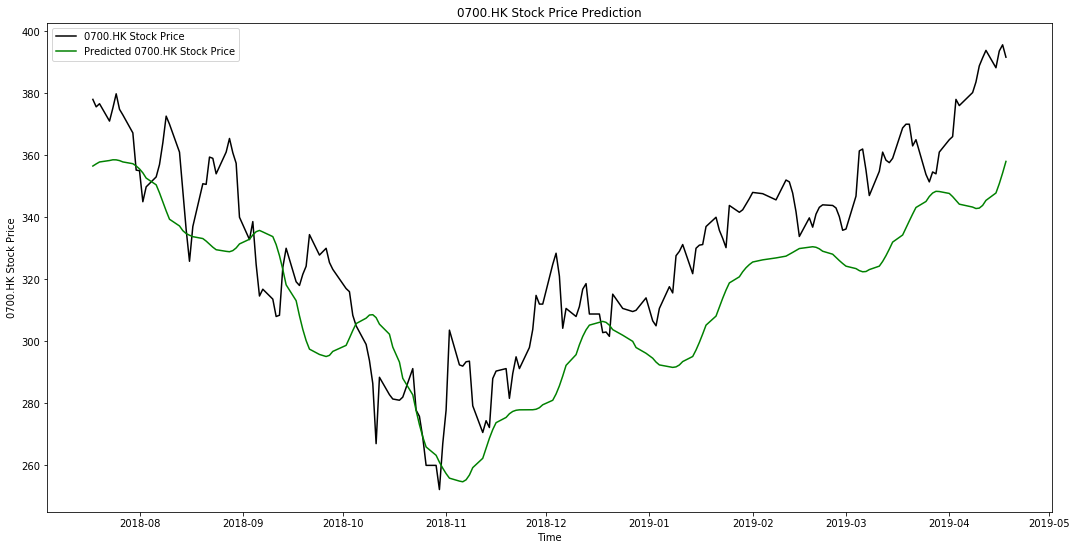

In [65]:
fig = plt.figure(figsize = (18,9))
plt.plot(date_predict,real_stock_price, color = 'black', label = '{} Stock Price'.format(name))
plt.plot(date_predict,predicted_stock_price, color = 'green', label = 'Predicted {} Stock Price'.format(name))
plt.title('{} Stock Price Prediction'.format(name))
plt.xlabel('Time')
plt.ylabel('{} Stock Price'.format(name))
plt.legend()
plt.show()

In [69]:
finishTime = time.strftime("%Y-%m-%d-%H-%M-%S", time.localtime()) 

In [70]:
regressor.save('trained_model/model/{}_model_{}.h5'.format(name,finishTime))  # creates a HDF5 file 'my_model.h5'
# 將參數儲存至 HDF5 檔案（不含模型）
regressor.save_weights('trained_model/model_weight/{}_model_weights_{}.h5'.format(name,finishTime))

In [71]:
fig.savefig('img/{}_{}.png'.format(name,finishTime))

In [61]:
# Converting to Plotly's Figure object..
# plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig = py.plot_mpl(fig, filename="my first plotly plot")

/Users/ShInGSon/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:390: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/Users/ShInGSon/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:487: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.

